<a href="https://colab.research.google.com/github/McnamaraChiwaye/Covid-19-Preprocessed-Dataset/blob/master/ML_GROUP_PROJECT_WITH_RUBRIC_TEXT2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP CHALLENGE FOR ML WITH RUBRIC TEXT

$Names$ $of$ $Students$:
    
    Ronald    Chiguguhlo: C20140502L 
    Sharon    Makunura  : C20140536D
    Alexio    Nyamutswa : C20140544E  
    Mcnamara  Chiwaye   : C20140511Q  
    Tanaka    Chada     : C20140481G
     

Classification of COVID-19 in chest X-ray images using convolutional neural network.

Convolutional Neural Networks
A CNN is a neural network where a signal feeds into a set of stacked
convolutional pooling layer pairs (convpool layers), and the output of the last layer feeds into a set of stacked fully connected layers that feed into a softmax layer. The convpool layers are the workhorse of modern-day CNNs for neural computer vision.

In [2]:
# mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# importing essential and relevant libraries for ml project

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# checking if the drive is mounted
!ls

drive  sample_data


In [4]:
 # choosing directory with datasets
 
DATASET_DIR = "/content/drive/My Drive/X-Ray Image dataset"

In [ ]:
# accessing the dataset directory

os.listdir(DATASET_DIR)

['Covid-19', 'No_Covid-19', 'Pneumonia']

In [ ]:
# importing more libraries

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**Exploratory Data Analysis of the chest X-ray images**

For this study, a cohort of 1129 poster anterior chest x-ray images obtained from a local institution was
used for image data collection for the development of the diagnostic CNN. The dataset consists of 1129 chest x-ray
images which can be subcategorised into three classes namely covid-19 images, non covid-19 images and 
lastly pneumonia chest x-ray images. 
The local dataset of chest x-ray images had no missing data. 
All the chest x-ray images were sourced from local health institutions across the country from the first 
positive cases of covid-19 that were recorded in the country to the time the data collection was finalised. 
There was no distinction between chest x-ray images belonging to males and those belonging to females. 
The images are shown below with their respective and distinct features.

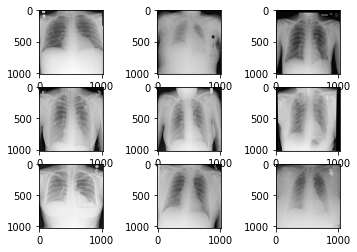

In [ ]:
#viewing chest x-ray image of NON COVID-19 individual
normal_images = []
for img_path in glob.glob(DATASET_DIR + '/No_Covid-19/*'):
    normal_images.append(mpimg.imread(img_path))

#display a few of the images in the folder

for i in range(9):
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(normal_images[i], cmap="gray" )
# show the figure
plt.show()



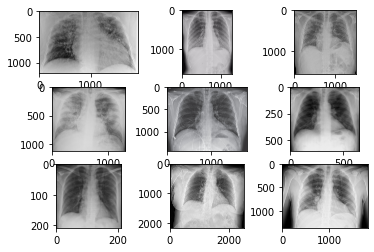

In [ ]:
#viewing chest x-ray image of COVID-19 individual
covid_images = []
for img_path in glob.glob(DATASET_DIR + '/Covid-19/*'):
    covid_images.append(mpimg.imread(img_path))

#display a few of the images in the folder

for i in range(9):
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(covid_images[i])
# show the figure
plt.show()

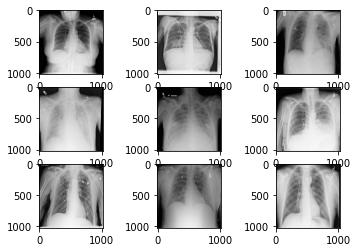

In [ ]:
#viewing chest x-ray image of individual with PNEUMONIA
pneumonia_images= []

for img_path in glob.glob(DATASET_DIR + '/Pneumonia/*'):
    pneumonia_images.append(mpimg.imread(img_path))

#display a few of the images in the folder

for i in range(9):
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(pneumonia_images[i], cmap="gray")
# show the figure
plt.show()

## DISTRIBUTION OF DIFFERENT CLASSES OF IMAGES PRESENT IN THE DATASET
In the dataset used in this study, there were three distinct classes of images of chest x-rays. The first class is that of covid-19 chest x-ray images, the second class is that of no-covid-19 chest x-ray images  whilst the last class of chest x-ray images is that of individuals with pneumonia. There was a skewed distribution in terms of the forementioned classes. The distribution of classes almost became bimodal, as there were 500 images in the no-covid 19 class and 504 images in the pneumonia class, whereas the number of covid-19 chest x-ray images were 125 in total in that single class.

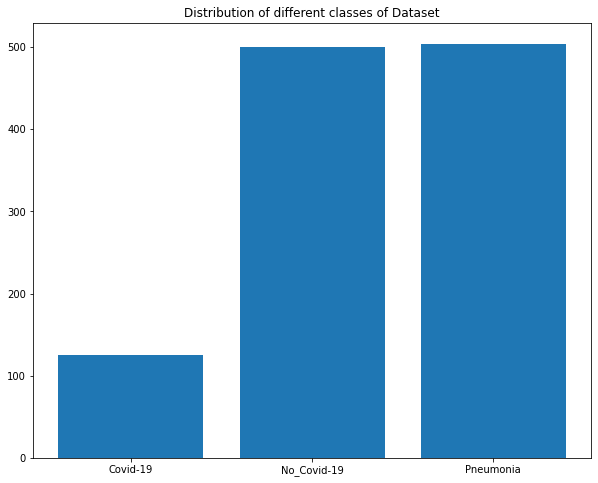

In [ ]:
image_folder = ['Covid-19', 'No_Covid-19', 'Pneumonia']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('..//content/drive/My Drive/Colab_Notebooks/X-Ray Image dataset/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes of Dataset')
plt.show()

In [ ]:
print(len(normal_images))


500


In [ ]:
print(len(covid_images))

125


In [ ]:
print(len(pneumonia_images))

504


In [ ]:
print(pneumonia_images[10])

[[0.10980392 0.15294118 0.09019608 ... 0.00392157 0.00392157 0.00392157]
 [0.22745098 0.3137255  0.1882353  ... 0.00784314 0.00784314 0.00392157]
 [0.21960784 0.29803923 0.1764706  ... 0.00784314 0.00784314 0.00392157]
 ...
 [0.00784314 0.01176471 0.01176471 ... 0.01568628 0.01568628 0.00784314]
 [0.00784314 0.01176471 0.01176471 ... 0.01176471 0.01568628 0.00784314]
 [0.00392157 0.00784314 0.00784314 ... 0.00392157 0.00392157 0.00392157]]


In [ ]:
print(covid_images[0])

[[[253 253 253]
  [251 251 251]
  [250 250 250]
  ...
  [250 250 250]
  [246 246 246]
  [255 255 255]]

 [[254 254 254]
  [252 252 252]
  [252 252 252]
  ...
  [255 255 255]
  [255 255 255]
  [252 252 252]]

 [[171 171 169]
  [170 170 168]
  [169 169 167]
  ...
  [164 164 164]
  [166 166 166]
  [214 214 214]]

 ...

 [[ 89  89  91]
  [ 78  78  80]
  [ 92  91  96]
  ...
  [ 76  77  81]
  [ 61  62  64]
  [172 173 175]]

 [[ 92  92  94]
  [ 78  78  80]
  [ 89  88  93]
  ...
  [ 76  77  81]
  [ 61  62  64]
  [172 173 175]]

 [[ 96  96  98]
  [ 79  79  81]
  [ 87  86  91]
  ...
  [ 76  77  81]
  [ 61  62  64]
  [172 173 175]]]


In [ ]:
print(normal_images[1])

[[0.30980393 0.50980395 0.23529412 ... 0.05490196 0.06666667 0.03921569]
 [0.5647059  0.5882353  0.18039216 ... 0.10588235 0.11764706 0.07450981]
 [0.14117648 0.10588235 0.07450981 ... 0.09019608 0.10196079 0.0627451 ]
 ...
 [0.09019608 0.16078432 0.16078432 ... 0.04705882 0.05098039 0.03137255]
 [0.09019608 0.16078432 0.16078432 ... 0.05098039 0.05098039 0.03137255]
 [0.04705882 0.08235294 0.08235294 ... 0.02745098 0.02745098 0.01568628]]


In [ ]:
# The choice of size of images per class for the images dataset 

This section seeks to randomly check the shapes and the sizes of the images in our dataset per class 
The images are classified as follows:   
1. Covid-19    = covid_images
2. No_Covid-19 = normal_images
3. Pneumonia   = pneumonia_images

In [ ]:
# checking the shape of normal images on index 0 and 120
# the shape is 1024, 1024 on index 0
print(normal_images[0].shape)

(1024, 1024)


In [ ]:
# the shape is 1024, 1024 on index 120

print(normal_images[120].shape)

(1024, 1024)


In [ ]:
# checking the shape of covid_images on index 5 and 201

print (normal_images[5].shape)

(1024, 1024)


In [ ]:
print (normal_images[201].shape)

(1024, 1024)


In [ ]:
# checking the shape of pneumonia_images on index 403 and 502

print (pneumonia_images[403].shape)

(1024, 1024)


In [ ]:
# checking the shape of pneumonia_images on index 502 

print (pneumonia_images[502].shape)

(1024, 1024)


It is important to note that the sizes and the shape of all the images in the 3 named classes are standardized hence they have a length of 1024  and a width of 1024. Because neural networks receive inputs of the same size, all the images from all 3 classes have to be resized to a fixed size before inputting them to the CNN.
Introducing various images of different shapes and sizes into a CNN can be a problem. The larger the fixed size of an image, the less shrinking is required. Less shrinking means that there is less deformation of features and patterns inside the image. When rescaling it is essential to ensure that the visual quality of the image is maintained and not lost(Cohen et al., 2020). Image resizing mitigates classification accuracy degradation due to deformations. In instances where images that are large in size are used, they occupy more storage space in the memory and also they result in a larger neural network. This therefore increases both the spatial and temporal complexity (Jin et al., 2017; Li et al., 2020). 

This explains why the 128 by 128 fixed images' size was chosen in our study, this being a trade-off between computational efficiency and accuracy.

Images larger than the fixed size (in one dimension or both) could be resized down to the desired fixed size using two approaches: cropping their border pixels or scaling them down using interpolation. Both approaches are lossy. While cropping poses the risk of missing the features or patterns that appear in border areas, scaling poses the risk of deforming features or patterns across the image (Chung et al., 2020; https://journalofbigdata.springeropen.com/articles/10.1186). Since deforming patterns is less risky than losing them, scaling is the reasonable choice to resize larger images down to the desired fixed size. Resizing smaller images up to the fixed size is the focus of this study. Zero-padding is proposed for this purpose and compared with the conventional approach of scaling images up (zooming in) using interpolation (Gu et al., 2020).


# Choice of CNN Architecture used or Transfer learning architecture applied
In this particular study, a CNN model for detecting COVID-19 from chest x-ray images will be be designed. The model design will be founded on the principle that in order to accurately classify and detect COVID-19 using chest x-ray images, practitioners are required to discriminate COVID-19 X-rays from those of individuals who test negative for the COVID-19 virus first, and then from there descrimination has to be made between chest x-ray images of COVID-19 positive patients and the chest x-ray images of individuals suffereing from pneumonia as there are subtle similarities between the two classes of inmages. Bearing these requirements in mind, we sought to design our efficient transfer learning architecture that constitutes of parallel layers where we have filters in each layer in different sizes. SoftMax and rectified linear unit (ReLU) activation functions were then applied to the convolved chest x-ray images. Many activation functions can be used in the activation layer,to convert all the linear details produced at the input and make the summation layer nonlinear. This helps users acquire more details about the input data that would not be possible if this were a linear function. Therefore, the activation layer plays an important role in predictions. Some
of the most familiar types of activation functions are sigmoid, ReLU, and softmax.
Using transfer learning (TL) in domains like medical imagery analysis is that multitudes of labelled medical images are not always available henceforth it is natural to consider using fine-tuned biasees and weights of CNN architectures trained on large databases such as ImageNet to be used for medical image analysis (Majeed et al., 2020).

# Image resizing

In [ ]:
IMG_W = 128  #224
IMG_H = 128
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 3
EPOCHS = 135 # changed to 120= 81%, changed to 200 = 93%
BATCH_SIZE = 20 # changed to 18 = 81%  # removed 40

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=INPUT_SHAPE))  # changed 32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(64))  # changed 32
model.add(Dense(64))  # added
model.add(Dropout(0.25))
model.add(Dense(3))   # last dense layer shud have 3 not 1
model.add(Activation("softmax"))

We build the different layers of the model. We will be using the
Keras implementation to build the different layers of the CNN. Now, we will use an optimization function with the help of the
compile method.

First layer-:Convolutional input layer, 64 feature maps with a size of 3 X 3, a rectifier activation function and a max pooling with size 2x2.

Second layer—:Convolutional layer, 32  feature maps with a size of 3 X 3, a rectifier activation function and a max pooling with size 2x2.

Third layer—: Convolutional layer, 64  feature maps with a size of 3 X 3,Convolutional layer, 250  feature maps with a size of 3 X 3 and a rectifier activation function.

Fourth layer—: Convolutional layer, 128  feature maps with a size of 3 X 3,a rectifier activation function, AvgPool2D, Convolutional layer, 64  feature maps with a size of 3 X 3, a rectifier activation function and a AvgPool2D with size 2x2.

Fifth layer-: Convolutional layer, 252  feature maps with a size of 3 X 3, a rectifier activation function and a max pooling with size 2x2.
Fifth layer-:
Flatten layer.
Fully connected layer with 64 plus more 64 units
Dropout layer at 25%.
Fully connected output layer with 3 units and a softmax activation function.

We can check the details of different layers built in the CNN model by using the summary method shown below.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',   # changed adam
              metrics=['accuracy'])

**PLOTTING MODEL SUMMARY ARCHITECTURE**




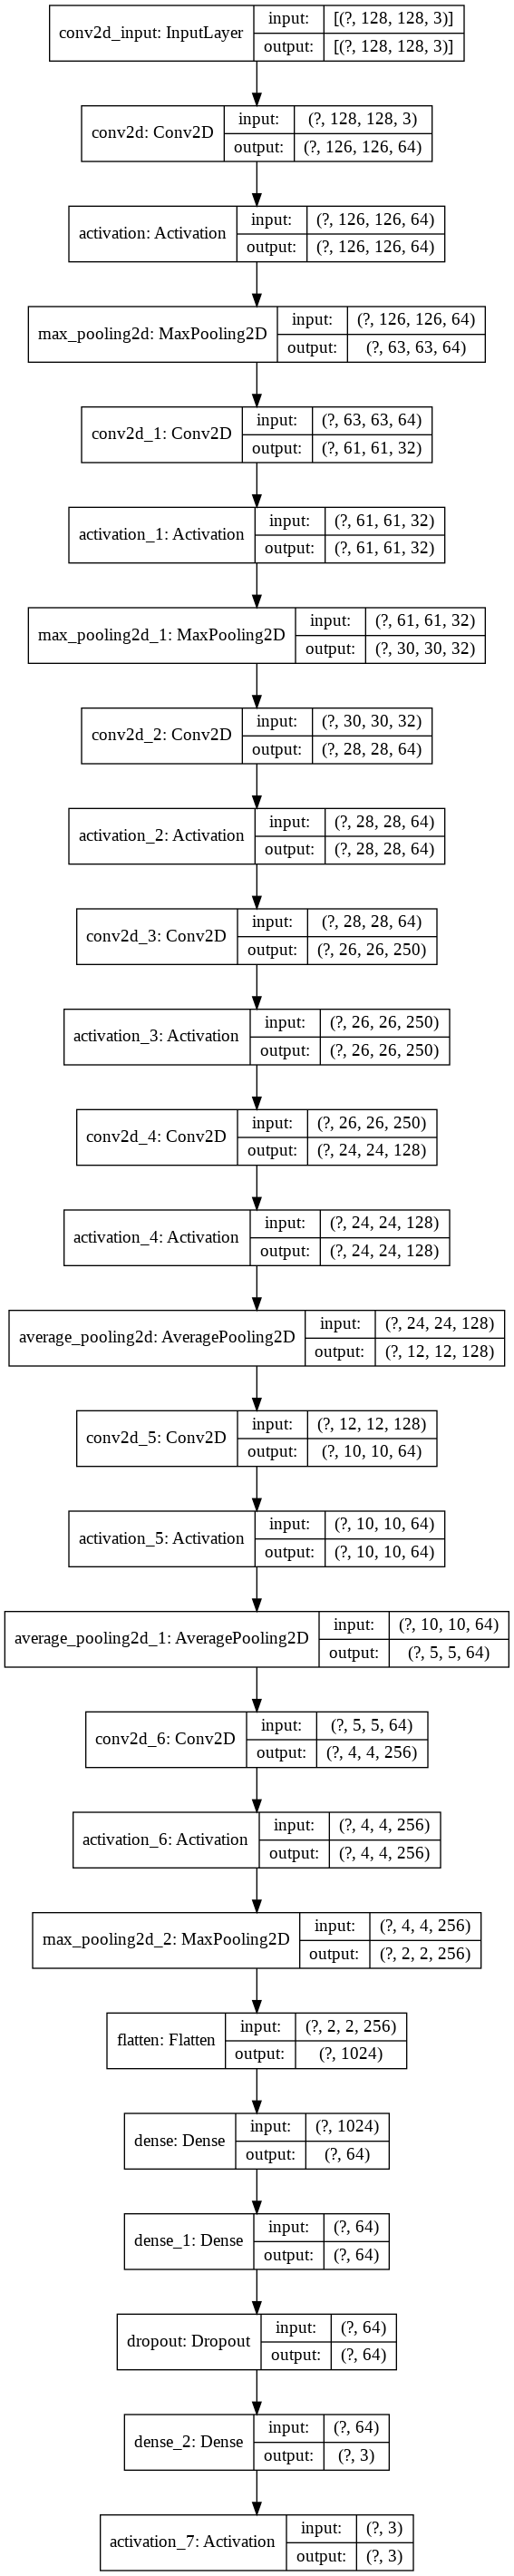

In [ ]:
plot_model(model, to_file='covid19_classification.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)   # changed 0.3

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # we set to categorical cz its a multi class classification
    shuffle= False,
    subset='validation')


# Early stopping 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('covid_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)




history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)




 

Found 904 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Epoch 1/120
22/22 [==============================] - 78s 4s/step - loss: 1.1964 - accuracy: 0.4491 - val_loss: 0.9381 - val_accuracy: 0.5000
Epoch 2/120
22/22 [==============================] - 75s 3s/step - loss: 0.9865 - accuracy: 0.4757 - val_loss: 0.7208 - val_accuracy: 0.3243
Epoch 3/120
22/22 [==============================] - 75s 3s/step - loss: 1.8002 - accuracy: 0.5266 - val_loss: 0.3835 - val_accuracy: 0.5135
Epoch 4/120
22/22 [==============================] - 75s 3s/step - loss: 0.9625 - accuracy: 0.5382 - val_loss: 1.2208 - val_accuracy: 0.5892
Epoch 5/120
22/22 [==============================] - 74s 3s/step - loss: 0.9774 - accuracy: 0.4850 - val_loss: 1.5279 - val_accuracy: 0.3243
Epoch 6/120
22/22 [==============================] - 74s 3s/step - loss: 1.1415 - accuracy: 0.5035 - val_loss: 0.8046 - val_accuracy: 0.7730
Epoch 7/120
22/22 [==============================] - 76s 3s/step - loss:

# HYPER PARAMETER TUNING RESULTS

From the above results  we have 85% model accuracy from 120 epochs, batch size of 40 and image size of 128 x 128. inorder to achieve better results we are going to increase the number of epochs to 200 on the tests below.

In [ ]:
IMG_W = 128  #224
IMG_H = 128
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 3
EPOCHS = 200 
BATCH_SIZE = 40 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',   # changed adam
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)   # changed 0.3

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # we set to categorical cz its a multi class classification
    shuffle= False,
    subset='validation')


# Early stopping 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('covid_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)





Found 904 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
22/22 [==============================] - 293s 13s/step - loss: 1.0839 - accuracy: 0.4375 - val_loss: 1.0270 - val_accuracy: 0.3750
Epoch 2/200
22/22 [==============================] - 78s 4s/step - loss: 1.0273 - accuracy: 0.4398 - val_loss: 1.0107 - val_accuracy: 0.3750
Epoch 3/200
22/22 [==============================] - 74s 3s/step - loss: 1.2822 - accuracy: 0.4711 - val_loss: 0.9675 - val_accuracy: 0.5000
Epoch 4/200
22/22 [==============================] - 75s 3s/step - loss: 0.9775 - accuracy: 0.4109 - val_loss: 0.9489 - val_accuracy: 0.4250
Epoch 5/200
22/22 [==============================] - 74s 3s/step - loss: 0.9575 - accuracy: 0.4711 - val_loss: 0.9415 - val_accuracy: 0.5200
Epoch 6/200
22/22 [==============================] - 75s 3s/step - loss: 0.9592 - accuracy: 0.4699 - val_loss: 0.8656 - val_accuracy: 0

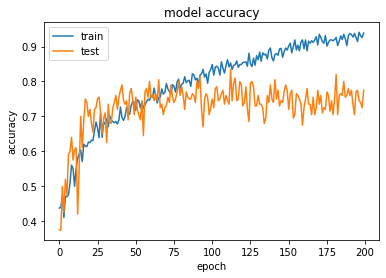

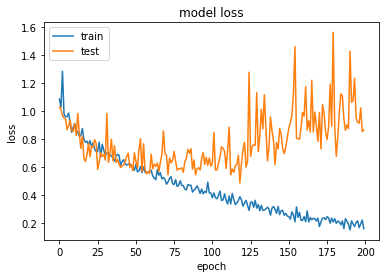

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9386574029922485
validation_accuracy 0.7749999761581421


# 3RD HYPER PARAMETER TUNING

INTRODUCING EARLY STOPPING


Changing epoch size from 125 to 48
On the model accuracy graph above, the test and test data accuracy started to diverge from epoch 125 or so.

In [ ]:
IMG_W = 128 #224
IMG_H = 128
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 3
EPOCHS = 48 # 
BATCH_SIZE = 40 # 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',   # changed adam
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)   # changed 0.3

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # we set to categorical cz its a multi class classification
    shuffle= False,
    subset='validation')


# Early stopping 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('covid_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)



history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS,
    callbacks=[es, mc])      # calling back early stopping and model checkpoint




 

Found 904 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Epoch 1/48
22/22 [==============================] - 187s 8s/step - loss: 1.0792 - accuracy: 0.4398 - val_loss: 0.9967 - val_accuracy: 0.3750
Epoch 2/48
22/22 [==============================] - 72s 3s/step - loss: 1.0081 - accuracy: 0.4456 - val_loss: 0.9940 - val_accuracy: 0.5000
Epoch 3/48
22/22 [==============================] - 72s 3s/step - loss: 1.0004 - accuracy: 0.4456 - val_loss: 0.9981 - val_accuracy: 0.3750
Epoch 4/48
22/22 [==============================] - 73s 3s/step - loss: 1.0228 - accuracy: 0.4568 - val_loss: 0.9921 - val_accuracy: 0.3750
Epoch 5/48
22/22 [==============================] - 72s 3s/step - loss: 0.9639 - accuracy: 0.4699 - val_loss: 0.9334 - val_accuracy: 0.4750
Epoch 6/48
22/22 [==============================] - 72s 3s/step - loss: 1.0380 - accuracy: 0.4653 - val_loss: 0.9419 - val_accuracy: 0.5150
Epoch 7/48
22/22 [==============================] - 72s 3s/step - loss: 0.930

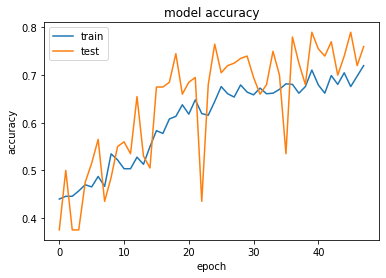

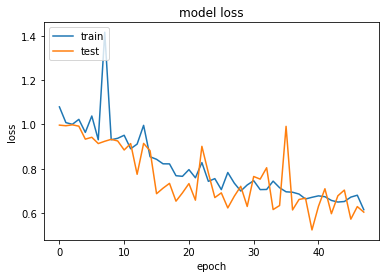

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Application of model checkpointing and Early stopping

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
activation_24 (Activation)   (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 61, 61, 32)        18464     
_________________________________________________________________
activation_25 (Activation)   (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 64)       

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)   # changed 0.3

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # we set to categorical cz its a multi class classification
    shuffle= False,
    subset='validation')


# Early stopping 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 130)  # , 
mc = ModelCheckpoint('covid_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)






history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS,
    callbacks=[es, mc])      # calling back early stopping and model checkpoint




 

Found 904 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/135
22/22 [==============================] - ETA: 0s - loss: 1.0577 - accuracy: 0.4271 
Epoch 00001: val_accuracy improved from -inf to 0.37500, saving model to covid_model.h5
22/22 [==============================] - 714s 32s/step - loss: 1.0577 - accuracy: 0.4271 - val_loss: 0.9882 - val_accuracy: 0.3750
Epoch 2/135
22/22 [==============================] - ETA: 0s - loss: 0.9974 - accuracy: 0.4387
Epoch 00002: val_accuracy improved from 0.37500 to 0.50000, saving model to covid_model.h5
22/22 [==============================] - 70s 3s/step - loss: 0.9974 - accuracy: 0.4387 - val_loss: 0.9872 - val_accuracy: 0.5000
Epoch 3/135
22/22 [==============================] - ETA: 0s - loss: 1.0167 - accuracy: 0.4421
Epoch 00003: val_accuracy did not improve from 0.50000
22/22 [==============================] - 70s 3s/step - loss: 1

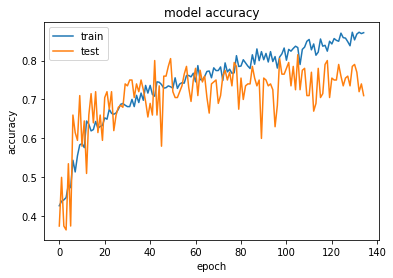

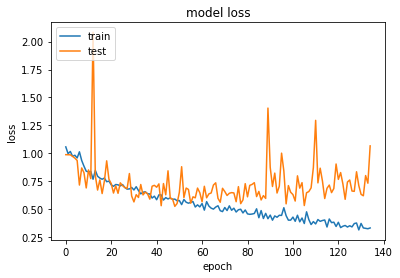

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
activation_8 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
activation_9 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)   # changed 0.3

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # we set to categorical cz its a multi class classification
    shuffle= False,
    subset='validation')


# Early stopping 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 110)  # , 
mc = ModelCheckpoint('covid_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)






history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS,
    callbacks=[es, mc])      # calling back early stopping and model checkpoint




 

Found 904 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Epoch 1/160
22/22 [==============================] - ETA: 0s - loss: 1.0740 - accuracy: 0.4410
Epoch 00001: accuracy improved from -inf to 0.44097, saving model to covid_model.h5
22/22 [==============================] - 71s 3s/step - loss: 1.0740 - accuracy: 0.4410 - val_loss: 0.9842 - val_accuracy: 0.5000
Epoch 2/160
22/22 [==============================] - ETA: 0s - loss: 0.9898 - accuracy: 0.4421
Epoch 00002: accuracy improved from 0.44097 to 0.44213, saving model to covid_model.h5
22/22 [==============================] - 73s 3s/step - loss: 0.9898 - accuracy: 0.4421 - val_loss: 0.9579 - val_accuracy: 0.5000
Epoch 3/160
22/22 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.4549
Epoch 00003: accuracy improved from 0.44213 to 0.45486, saving model to covid_model.h5
22/22 [==============================] - 70s 3s/step - loss: 0.9957 - accuracy: 0.4549 - val_loss: 0.9674 - val_accur

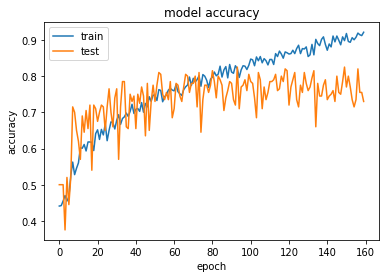

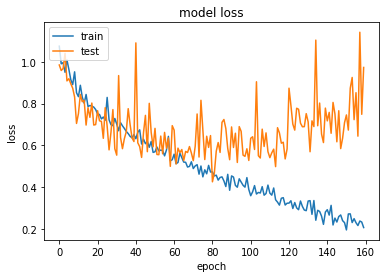

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#PERFORMANCE METRICS
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9212962985038757
validation_accuracy 0.7300000190734863



# This is the model we  are adopting 
HYPER PARAMETER , patience = 10, epoch = 135

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        1

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)   # changed 0.3

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # we set to categorical cz its a multi class classification
    shuffle= False,
    subset='validation')


# Early stopping 

es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience= 20)  # , 
mc = ModelCheckpoint('covid_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)




history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS,
    callbacks=[es, mc])      # calling back early stopping and model checkpoint




 

Found 904 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/135
45/45 [==============================] - ETA: 0s - loss: 1.0447 - accuracy: 0.4480
Epoch 00001: accuracy improved from -inf to 0.44796, saving model to covid_model.h5
45/45 [==============================] - 399s 9s/step - loss: 1.0447 - accuracy: 0.4480 - val_loss: 0.9751 - val_accuracy: 0.4545
Epoch 2/135
45/45 [==============================] - ETA: 0s - loss: 0.9880 - accuracy: 0.4400
Epoch 00002: accuracy did not improve from 0.44796
45/45 [==============================] - 76s 2s/step - loss: 0.9880 - accuracy: 0.4400 - val_loss: 0.9693 - val_accuracy: 0.4273
Epoch 3/135
45/45 [==============================] - ETA: 0s - loss: 0.9771 - accuracy: 0.4310
Epoch 00003: accuracy did not improve from 0.44796
45/45 [==============================] - 80s 2s/step - loss: 0.9771 - accuracy: 0.4310 - val_loss: 0.9556 - val_

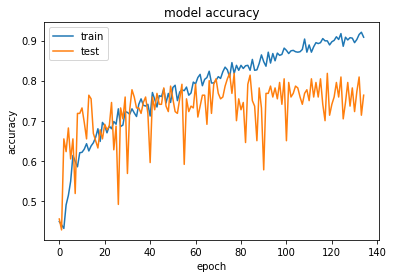

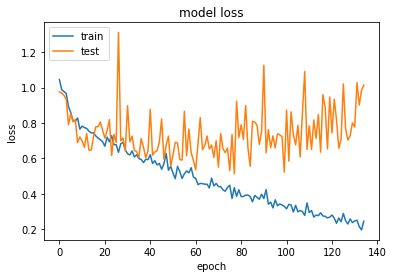

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Performance Metrics and Classification Report of the CNN model

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9083710312843323
validation_accuracy 0.7636363506317139


In [ ]:
label = validation_generator.classes

In [ ]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 2 0 2 2 2 0 0 0 0 0 2 2 2 0 2 2 0 0 2 2 0 0 0 1 2 1 1 2 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 2
 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 0 2 2 2 1 2 2 2 1 2
 2 2 2 1 2 2 2 2 2 0 2 1 1 2 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 1 1 2
 2 2 2]
{'Covid-19': 0, 'No_Covid-19': 1, 'Pneumonia': 2}
['Covid-19', 'Pneumonia', 'Covid-19', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Covid-19', 'Covid-19', 'Covid-19', 'Covid-19', 'Covid-19', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Covid-19', 'Pneumonia', 'Pneumonia', 'Covid-19', 'Covid-19', 'Pneumonia', 'Pneumonia', 'Covid-19', 'Covid-19', 'Covid-19', 'No_Covid-19', 'Pneumonia', 'No_Covid-19', 'No_Covid-19', 'Pneumonia', 'No_Covid-19', 'No_Covid-19', 'No_Covid-19', 'No_Covid-19', 'Pneumonia', 'No_Covid-19', 'Pneumonia', 'No_Covid-19', 'No_C

In [ ]:
# SAVING Model

!mkdir -p saved_model 

model.save("/content/drive/My Drive/Colab Notebooks/saved_model/Covid_19_classifier")
print("model saved")


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/saved_model/Covid_19_classifier/assets
model saved


In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[13,  0,  5],
       [ 1, 82, 18],
       [11, 18, 77]])

In [ ]:
# Confusion Matrix

In [ ]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,2,All
Actual,,,,
0,13,1,11,25
1,0,82,18,100
2,5,18,77,100
All,18,101,106,225


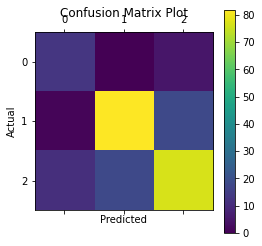

In [ ]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

# References

1. Chung M, Bernheim A, Mei X et al (2020) CT imaging features of 2019 novel coronavirus (2019-nCoV). Radiology 295(1):202–207


2. Cohen, J. P., Dao, L., Morrison, P., Roth, K., Bengio, Y., Shen, B., Abbasi, A., Hoshmand-Kochi, M.,  Ghassemi, M., Li, H & Duong, T. Q. (2020). Predicting COVID-19 Pneumonia Severity on Chest X-ray with Deep Learning. Retrieved on 3/08/2020.


3. Gu J, Wang Z, Kuen J, Ma L, Shahroudy A, Shuai B, Liu T et al (2018) Recent advances in convolutional neural networks. Pattern Recogn 77:354–377


4. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0263-7#:~:text=Since%20neural%20networks%20receive%20inputs,and%20patterns%20inside%20the%20image.


5. Jin KH, McCann MT, Froustey E, Unser M (2017) Deep convolutional neural network for inverse problems in imaging. IEEE Trans Image Process 26(9):4509–4522

6. https://www.kaggle.com/crawford/lung-infiltration-cnn-with-keras-on-chest-x-rays


7. Li X, Zeng X, Liu B, Yu Y (2020) COVID-19 infection presenting with CT halo sign. Radiol Cardiothorac Imaging. https://doi.org/10. 1148/ryct.2020200026


8. Majeed, T., Rashid, R., Ali, D., & Asaad, A. (2020). Covid-19 detection using CNN transfer learning from X-ray Images. doi: https://doi.org/10.1101/2020.05.12.20098954. Retrieved on 3/08/2020.


9. https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8


10. https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays 